### Graham Kerr
#### graham.s.kerr@NASA.gov; kerrg@cua.edu

<H1 font size="+3" style="color:red">
O I in Flares<br>
-- IRIS SJI Initial <br>
</H1>

<b>This notebook will</b>
> - Read in IRIS SJI data
> - Allow quicklooks
> - Extract the data and header info
> - Grab the solar-x and solar-y info
> - Correct for exposure time





---
### <b style="color:blue"> Some set up </b>

***Import Modules***

In [99]:
##
## Import various modules -- can tidy up later
##
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import re
from scipy import io
import pickle
import cmocean
import copy
import iris_lmsalpy
import astropy
import pandas as pd
sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs')
import utils

---
### <b style="color:blue"> Read in the data </b>

> - Just comment out if there if any of the filters are missing

In [3]:
##
## The SJI filenames
## 

dir1 = '/Users/gskerr1/Documents/Research/Melissa_OI_IRIS/2014_10_25_1500/'

# filename_1400 = dir1+'iris_l2_20140910_112825_3860259453_SJI_1400_t000.fits'
filename_1330 = dir1+'iris_l2_20141025_145828_3880106953_SJI_1330_t000.fits'
filename_2832 = dir1+'iris_l2_20141025_145828_3880106953_SJI_2832_t000.fits'
filename_2796 = dir1+'iris_l2_20141025_145828_3880106953_SJI_2796_t000.fits'

In [4]:
##
## Create SJI objects
##
# sji_1400 = iris_lmsalpy.extract_irisL2data.load(filename_1400)
sji_1330 = iris_lmsalpy.extract_irisL2data.load(filename_1330)
sji_2832 = iris_lmsalpy.extract_irisL2data.load(filename_2832)
sji_2796 = iris_lmsalpy.extract_irisL2data.load(filename_2796)

Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpkhjj4acs
Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpm6iv9uut
Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpjq9hfoay


> - The data cubes [x,y,time] are saved as memory map objects, but if we want to modify them (e.g. normalise by exposure time etc.,) then we need to have them in the computer memory properly.

In [5]:
##
## Bring them into local memory so we can modify them
##
# sji_1400.flush()
sji_1330.flush()
sji_2832.flush()
sji_2796.flush()

Removing temporary file... /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpkhjj4acs
Removing temporary file... /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpm6iv9uut
Removing temporary file... /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpjq9hfoay


> - The SJI data are image cubes of [x,y,time], and are accessed from each object.
> - Each object is a dictionary, containing certain 'keys'

In [6]:
## This tell us that the variable 'SJI_1400' is a key of sji_1400.SJI object
sji_1330.SJI.keys()

dict_keys(['SJI_1330'])

In [7]:
## held within that is another dictionary (I know...)
sji_1330.SJI['SJI_1330'].keys()

dict_keys(['data', 'wl', 'date_in_filename', 'iris_obs_code', 'raster_info', 'DATE_OBS', 'DATE_END', 'TDET', 'TDESCT', 'TWAVE', 'TWMIN', 'TWMAX', 'SPCSCL', 'SPXSCL', 'SPYSCL', 'POS_X', 'POS_Y', 'SLTPX1IX', 'SLTPX2IX', 'XCENIX', 'YCENIX', 'date_time_acq', 'date_time_acq_ok', 'extent_arcsec_arcsec', 'extent_px_px', 'extent_px_arcsec', 'extent_opt', 'extent_opt_coords', 'list_extent', 'list_extent_coords', 'temp_memmap_filename', 'clip_ima', 'cmap', 'slit_acqnum', '_SJI__clip_ima_ini', 'poi', '_SJI__animate', '_SJI__delay', '_SJI__dim_data', '_SJI__count_e', 'show_slit', '_SJI__show_title', '_SJI__linewidth', 'xlim1', 'ylim1', 'xlim2', 'ylim2', 'extent_display', 'extent_display_coords', '_SJI__count_poi', '_SJI__move_count_poi', 'set_IRIS', 'figsize', '_SJI__figsize_ori', 'temp_memmap_obj'])

In [8]:
## data holds the actual images, the size of which is
sji_1330.SJI['SJI_1330'].data.shape

(387, 365, 680)

***The header files contain lots of metadata and useful info we need for the analysis***
> - There are different extensions to the fits headers that each contain different info, some of them are part of the time-series info, some are more general for the full observing run.
> - To be honest I find them rather confusing sometimes, but some experimenting, checking the code for iris_lmsalpy, and Alberto's docs for iris_lmsalpy helped me figure out what to grab 

In [9]:
##
## Create header to hold bulk of info from extension 0
##
# hdr_1400_ext0 = iris_lmsalpy.extract_irisL2data.only_header(filename_1400, extension = 0)
hdr_1330_ext0 = iris_lmsalpy.extract_irisL2data.only_header(filename_1330, extension = 0)
hdr_2832_ext0 = iris_lmsalpy.extract_irisL2data.only_header(filename_2832, extension = 0)
hdr_2796_ext0 = iris_lmsalpy.extract_irisL2data.only_header(filename_2796, extension = 0)

In [10]:
##
## Create header to hold bulk of info from extension 1
##
# hdr_1400_ext1 = iris_lmsalpy.extract_irisL2data.only_header(filename_1400, extension = 1)
hdr_1330_ext1 = iris_lmsalpy.extract_irisL2data.only_header(filename_1330, extension = 1)
hdr_2832_ext1 = iris_lmsalpy.extract_irisL2data.only_header(filename_2832, extension = 1)
hdr_2796_ext1 = iris_lmsalpy.extract_irisL2data.only_header(filename_2796, extension = 1)

In [11]:
##
## Create header to hold bulk of info from extension 2
##
# hdr_1400_ext2 = iris_lmsalpy.extract_irisL2data.only_header(filename_1400, extension = 2)
hdr_1330_ext2 = iris_lmsalpy.extract_irisL2data.only_header(filename_1330, extension = 2)
hdr_2832_ext2 = iris_lmsalpy.extract_irisL2data.only_header(filename_2832, extension = 2)
hdr_2796_ext2 = iris_lmsalpy.extract_irisL2data.only_header(filename_2796, extension = 2)

> - Lets look at what is inside the header ext 0
> - Then, access one of the variables... we will choose the naxis 3 variable, which is the number of frames we have of 1400A images. 

In [12]:
hdr_1330_ext0.keys

<bound method Header.keys of SIMPLE  =                    T / Written by IDL:  Sat May 16 02:01:38 2020      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                  365 /                                                
NAXIS2  =                  387 /                                                
NAXIS3  =                  680 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2020-05-16'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'IRIS    '           /                                                
INSTRUME= 'SJI     '           /                                                

In [15]:
# numframes_1400 = hdr_1400_ext0['naxis3']
numframes_1330 = hdr_1330_ext0['naxis3']
numframes_2796 = hdr_2796_ext0['naxis3']
numframes_2832 = hdr_2832_ext0['naxis3']

# print("number of 1400A frames = %d" %(numframes_1400))
print("number of 1330A frames = %d" %(numframes_1330))
print("number of 2832A frames = %d" %(numframes_2832))
print("number of 2796A frames = %d" %(numframes_2796))

number of 1330A frames = 680
number of 2832A frames = 680
number of 2796A frames = 680


> - Lets look at what is inside the header ext 1 and 2
> - These are a bit different, and tell us what index of the header file data (next set of cells) each parameter is held in

In [16]:
hdr_1330_ext1.keys

<bound method Header.keys of XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                   31 /                                                
NAXIS2  =                  680 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
TIME    =                    0 /time of each exposure in s after start of OBS (r
PZTX    =                    1 /PZTX of each exposure in arcsec (rowindex)      
PZTY    =                    2 /PZTY of each exposure in arcsec (rowindex)      
EXPTIMES=                    3 /SJI Exposure duration of each exposure in s (row
SLTPX1IX=                    4 /Slit center in X of each exposure in window-pixe

In [17]:
hdr_1330_ext2.keys

<bound method Header.keys of XTENSION= 'TABLE   '           / ASCII table extension                          
BITPIX  =                    8 / 8 bit bytes                                    
NAXIS   =                    2 / 2-dimensional ASCII table                      
NAXIS1  =                  145 / Number of positions along axis 1               
NAXIS2  =                  680 / Number of positions along axis 2               
PCOUNT  =                    0 / Size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / Number of fields in each row                   
TBCOL1  =                    1 /                                                
TFORM1  = 'A10     '           /                                                
TTYPE1  = 'FRMID   '           /                                                
FRMID   =                    0 /FRM ID of each exposure (rowindex)              

> - Now we grab the actual values from the header files

In [19]:
##
## Grab the data for the header extension 1
##
# data_1400_ext1 = iris_lmsalpy.extract_irisL2data.only_data(filename_1400, extension=1)
data_1330_ext1 = iris_lmsalpy.extract_irisL2data.only_data(filename_1330, extension=1)
data_2832_ext1 = iris_lmsalpy.extract_irisL2data.only_data(filename_2832, extension=1)
data_2796_ext1 = iris_lmsalpy.extract_irisL2data.only_data(filename_2796, extension=1)


##
## Grab the data for the header extension 2
##
# data_1400_ext2 = iris_lmsalpy.extract_irisL2data.only_data(filename_1400, extension=2)
data_1330_ext2 = iris_lmsalpy.extract_irisL2data.only_data(filename_1330, extension=2)
data_2832_ext2 = iris_lmsalpy.extract_irisL2data.only_data(filename_2832, extension=2)
data_2796_ext2 = iris_lmsalpy.extract_irisL2data.only_data(filename_2796, extension=2)

Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpg578fmis
Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmp1bn10kg8
Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpjbkol1m3
Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmp9fzgipub
Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmpw1aqrj4_
Creating temporary file...  /var/folders/t8/737ksbrs7wscy5j_wy_320t40000gp/T/tmps_ustlmd


***Now we assign some of those values to variables that we want to use later***

> - number of exposures (frames) for each filter

In [20]:
##
## Number of exposures
##
# nexp_1400 = hdr_1400_ext0['naxis3']
nexp_1330 = hdr_1330_ext0['naxis3']
nexp_2832 = hdr_2832_ext0['naxis3']
nexp_2796 = hdr_2796_ext0['naxis3']

> - number of pixels in the x- and y- direction (usually this is also x- and y- on the Sun, but sometimes the spacecraft is rotated by 45 or 90 degrees)

In [21]:
##
## Number of x and y pixels
##
# nx_1400 = hdr_1400_ext0['naxis1']
nx_1330 = hdr_1330_ext0['naxis1']
nx_2832 = hdr_2832_ext0['naxis1']
nx_2796 = hdr_2796_ext0['naxis1']

# ny_1400 = hdr_1400_ext0['naxis2']
ny_1330 = hdr_1330_ext0['naxis2']
ny_2832 = hdr_2832_ext0['naxis2']
ny_2796 = hdr_2796_ext0['naxis2']

> - The exposure time for each exposure (how long was the shutter on the camera open). This is sometimes constant, but usually there is some level of variation. This variation may be small or if the automatic flare detection flag was triggered the exposure time can drop suddenely (in flares the exposure time might drop in order to not saturate that camera).
> - We know what index this is held in by looking at the ext1 header info above. 
> - Lets plot the exposure times to see how much they vary.

In [22]:
##
## Grab exposure times 
##
# exptimes_1400 = data_1400_ext1[:,3]
exptimes_1330 = data_1330_ext1[:,3]
exptimes_2832 = data_2832_ext1[:,3]
exptimes_2796 = data_2796_ext1[:,3]

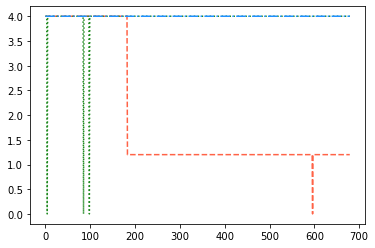

In [23]:
%matplotlib inline
# plt.plot(exptimes_1400, color = 'black', label = '1400', linestyle = '-')
plt.plot(exptimes_1330, color = 'tomato', label = '1330',linestyle = '--')
plt.plot(exptimes_2832, color = 'forestgreen', label = '2832', linestyle = ':')
plt.plot(exptimes_2796, color = 'dodgerblue', label = '2796', linestyle = '-.')
plt.show()

---
### <b style="color:blue"> Correct for Exposure time </b>

> - Since exposure time varies over time, we want to make sure that if we compare different frames we comparing apples-to-apples. 
> - The data are in Counts, often referred to as Data Numbers (DN).
> - Dividing by the exposure time (how long the telescope was looking for) we can get DN/s, which can be more directly compared from frame to frame.

In [25]:
##
## Correct for Exposure Times
##
# sji_1400.SJI['SJI_1400'].data/=exptimes_1400
sji_1330.SJI['SJI_1330'].data/=exptimes_1330
sji_2832.SJI['SJI_2832'].data/=exptimes_2832
sji_2796.SJI['SJI_2796'].data/=exptimes_2796

---
### <b style="color:blue"> Lets use the in-built iris_lmsalpy methods for quicklook </b>

> - First set some limits (trial and error, you'll probably have to fiddle with the intensity ranges to clip).
> - Then run the quicklook method, which opens an interactive window (check Alberto's docs for some keystroke commands to manually change the intensity ranges etc.,)
      

In [26]:
##
## Some stuff for plotting
##
# sji_1400.SJI['SJI_1400'].show_slit = True
# sji_1400.SJI['SJI_1400'].clip_ima = [0, 1000]

sji_1330.SJI['SJI_1330'].show_slit = False
sji_1330.SJI['SJI_1330'].clip_ima = [0, 200]

sji_2832.SJI['SJI_2832'].show_slit = False
sji_2832.SJI['SJI_2832'].clip_ima = [0, 2500]

sji_2796.SJI['SJI_2796'].show_slit = True
sji_2796.SJI['SJI_2796'].clip_ima = [0, 2500]

In [28]:
#
# Quick look plotting
#
%matplotlib tk
sji_2796.quick_look()

## You might have to run this cell twice when loading the 
#tk backend to make it plot in an interactive window

In [ ]:
#
# Quick look plotting
#
#%matplotlib tk
sji_1330.quick_look()

---
### <b style="color:blue"> Grab the slit locations, in arcseconds </b>

> - Uses a few variables from the header files, we can discuss what those variables are, or check the header ext info

In [29]:
##
## Slit location in arcsecs
## 

# lcslit_1400 = ( (sji_1400.SJI['SJI_1400']['SLTPX1IX'] - np.repeat(hdr_1400_ext0['CRPIX1'],nexp_1400)) * 
#           hdr_1400_ext0['CDELT1'] + 
#           sji_1400.SJI['SJI_1400'].XCENIX)
lcslit_1330 = ( (sji_1330.SJI['SJI_1330']['SLTPX1IX'] - np.repeat(hdr_1330_ext0['CRPIX1'],nexp_1330)) * 
          hdr_1330_ext0['CDELT1'] + 
          sji_1330.SJI['SJI_1330'].XCENIX)
lcslit_2832 = ( (sji_2832.SJI['SJI_2832']['SLTPX1IX'] - np.repeat(hdr_2832_ext0['CRPIX1'],nexp_2832)) * 
          hdr_2832_ext0['CDELT1'] + 
          sji_2832.SJI['SJI_2832'].XCENIX)
lcslit_2796 = ( (sji_2796.SJI['SJI_2796']['SLTPX1IX'] - np.repeat(hdr_2796_ext0['CRPIX1'],nexp_2796)) * 
          hdr_2796_ext0['CDELT1'] + 
          sji_2796.SJI['SJI_2796'].XCENIX)

---
### <b style="color:blue"> If you want to save the data and header info for use later </b>

> - Saves the data, and header info, in a dictionary that you can load in another notebook for analysis
> - Doing this a lot can make some pretty large files... some people like just running through the above each time they analyse the SJI, but I prefer to save them and load them in later for future analysis
> - This saves them all in one big file, so all the SJI wavelengths in a single place, but you can modify the code to save each filter separately if you wish.

In [30]:
##
## Create a dictionary in which to save the data
##
sji_dict = {
            'sji_2832':sji_2832.SJI['SJI_2832']['data'], 
            'sji_1330':sji_1330.SJI['SJI_1330']['data'],
#             'sji_1400':sji_1400.SJI['SJI_1400']['data'],
            'sji_2796':sji_2796.SJI['SJI_2796']['data'],
            'xcen_2832':sji_2832.SJI['SJI_2832'].XCENIX,
            'xcen_1330':sji_1330.SJI['SJI_1330'].XCENIX,
#             'xcen_1400':sji_1400.SJI['SJI_1400'].XCENIX,
            'xcen_2796':sji_2796.SJI['SJI_2796'].XCENIX,
            'ycen_2832':sji_2832.SJI['SJI_2832'].YCENIX,
            'ycen_1330':sji_1330.SJI['SJI_1330'].YCENIX,
#             'ycen_1400':sji_1400.SJI['SJI_1400'].YCENIX,
            'ycen_2796':sji_2796.SJI['SJI_2796'].YCENIX,
            'SLTPX1IX_2832':sji_2832.SJI['SJI_2832']['SLTPX1IX'],
            'SLTPX1IX_1330':sji_1330.SJI['SJI_1330']['SLTPX1IX'],
#             'SLTPX1IX_1400':sji_1400.SJI['SJI_1400']['SLTPX1IX'],
            'SLTPX1IX_2796':sji_2796.SJI['SJI_2796']['SLTPX1IX'],
            'lcslit_2832':lcslit_2832,
            'lcslit_1330':lcslit_1330,
#             'lcslit_1400':lcslit_1400,
            'lcslit_2796':lcslit_2796,
            'hdr_2832_ext0':hdr_2832_ext0,
            'hdr_1330_ext0':hdr_1330_ext0,
#             'hdr_1400_ext0':hdr_1400_ext0,
            'hdr_2796_ext0':hdr_2796_ext0,
            'time_2832':sji_2832.SJI['SJI_2832'].date_time_acq_ok,
            'time_1330':sji_1330.SJI['SJI_1330'].date_time_acq_ok,
#             'time_1400':sji_1400.SJI['SJI_1400'].date_time_acq_ok,
            'time_2796':sji_2796.SJI['SJI_2796'].date_time_acq_ok,
            'readme':'SJI data has been exposure corrected'}
file_sji = 'IRIS_SJI_2014_Oct_25_exptimecorr.pkl'
with open(file_sji, 'wb') as output:  # Overwrites any existing file.
    pickle.dump(sji_dict, output, pickle.HIGHEST_PROTOCOL)
            

In [ ]:
##
## Set the data part to zero, to save space, and then save the object with header info
##
# sji_2832.SJI['SJI_2832']['data'][:,:,:] = 0
# sji_1330.SJI['SJI_1330']['data'][:,:,:] = 0
# sji_1400.SJI['SJI_1400']['data'][:,:,:] = 0
# sji_1400.SJI['SJI_2796']['data'][:,:,:] = 0


# iris_lmsalpy.extract_irisL2data.save(sji_2832, filename = 'SJI2832_2014_Sept_10')
# iris_lmsalpy.extract_irisL2data.save(sji_1330, filename = 'SJI1330_2014_Sept_10')
# iris_lmsalpy.extract_irisL2data.save(sji_1400, filename = 'SJI1400_2014_Sept_10')
# iris_lmsalpy.extract_irisL2data.save(sji_2796, filename = 'SJI2796_2014_Sept_10')

> - This is the command to read the pickle (pkl) file back into memory

In [87]:
file_sji = 'IRIS_SJI_2014_Oct_25_exptimecorr.pkl'
with open(file_sji, 'rb') as output:  
    sji_dict = pickle.load(output)

In [88]:
sji_dict.keys()

dict_keys(['sji_2832', 'sji_1330', 'sji_2796', 'xcen_2832', 'xcen_1330', 'xcen_2796', 'ycen_2832', 'ycen_1330', 'ycen_2796', 'SLTPX1IX_2832', 'SLTPX1IX_1330', 'SLTPX1IX_2796', 'lcslit_2832', 'lcslit_1330', 'lcslit_2796', 'hdr_2832_ext0', 'hdr_1330_ext0', 'hdr_2796_ext0', 'time_2832', 'time_1330', 'time_2796', 'readme'])

---
### <b style="color:blue"> Look at selecting only certain times</b>



> - Printing the times, we can see that sometimes the data is corrupted. 
> - Lets remove those, if they are 
> - I SHOW 2832 HERE BUT YOU CAN COPY FOR THE OTHER SJI WINDOWS

In [89]:
### SHAPE BEFORE REMOVING INDICES
sji_dict['sji_2832'].shape

(387, 365, 680)

In [92]:
sji_dict['time_2832']

array(['2014-10-25 14:58:36.42', '2014-10-25 14:58:52.52',
       '2014-10-25 14:59:08.61', '2014-10-25 14:59:24.70',
       '2014-10-25 14:59:56.89', '2014-10-25 15:00:12.98',
       '2014-10-25 15:00:29.08', '2014-10-25 15:00:45.17',
       '2014-10-25 15:01:01.27', '2014-10-25 15:01:17.36',
       '2014-10-25 15:01:33.45', '2014-10-25 15:01:49.55',
       '2014-10-25 15:02:05.64', '2014-10-25 15:02:21.73',
       '2014-10-25 15:02:37.83', '2014-10-25 15:02:53.92',
       '2014-10-25 15:03:10.02', '2014-10-25 15:03:26.11',
       '2014-10-25 15:03:42.20', '2014-10-25 15:03:58.30',
       '2014-10-25 15:04:14.39', '2014-10-25 15:04:30.48',
       '2014-10-25 15:04:46.58', '2014-10-25 15:05:02.67',
       '2014-10-25 15:05:18.77', '2014-10-25 15:05:34.86',
       '2014-10-25 15:05:50.95', '2014-10-25 15:06:07.05',
       '2014-10-25 15:06:23.14', '2014-10-25 15:06:39.23',
       '2014-10-25 15:06:55.33', '2014-10-25 15:07:11.42',
       '2014-10-25 15:07:27.52', '2014-10-25 15:07:43.61

In [91]:
inds = np.where(np.array(sji_dict['time_2832']) == '-- ::.')
sji_dict['sji_2832'] = np.delete(sji_dict['sji_2832'],inds,axis=-1)
sji_dict['time_2832'] = np.delete(sji_dict['time_2832'],inds)
sji_dict['xcen_2832'] = np.delete(sji_dict['xcen_2832'],inds,axis=-1)
sji_dict['ycen_2832'] = np.delete(sji_dict['ycen_2832'],inds,axis=-1)
sji_dict['SLTPX1IX_2832'] = np.delete(sji_dict['SLTPX1IX_2832'],inds,axis=-1)
sji_dict['lcslit_2832'] = np.delete(sji_dict['lcslit_2832'],inds,axis=-1)



In [93]:
### SHAPE AFTER REMOVING INDICES
sji_dict['sji_2832'].shape

(387, 365, 677)

***Now turn these into a datetime object***

In [96]:
datetime_2832 = pd.to_datetime(sji_dict['time_2832'])

***Now search for some specific times***

In [116]:
t1 = '2014-10-25 16:15:00.00'
t2 = '2014-10-25 17:30:00.00'

## Where are the times closest to the requested times? This uses a code called 
## utils, that is in the github repo. Make sure in the import modules section that you 
## update the path. That is, where you have put the file on your computer. 
time_s_near = utils.nearest(datetime_2832,pd.to_datetime(t1))
time_f_near = utils.nearest(datetime_2832,pd.to_datetime(t2))

## These times are the closest values to the requested time, they are not the exact requested times
print(time_s_near)
print(time_f_near)

## We want to know what indices those are in the dateobs part of the dictionary.
## the [0][0] is to extract the number itself, otherwise it is inside an array. 
## check what happens if you comment out the [0][0]
tind_s = np.where(datetime_2832 == time_s_near)[0][0]
tind_f = np.where(datetime_2832 == time_f_near)[0][0]

print()
print(tind_s)
print(tind_f)

## now lets confirm they are correct
print()
print(datetime_2832[tind_s])
print(datetime_2832[tind_f])

2014-10-25 16:15:03.140000
2014-10-25 17:29:53.300000

282
561

2014-10-25 16:15:03.140000
2014-10-25 17:29:53.300000


***We can put all this together***

In [118]:
tind_s = np.where(datetime_2832 == utils.nearest(datetime_2832,pd.to_datetime(t1)) )[0][0]
tind_f = np.where(datetime_2832 == utils.nearest(datetime_2832,pd.to_datetime(t2)) )[0][0]

***We can even next the datetime command***

In [119]:
tind_s = np.where(pd.to_datetime(sji_dict['time_2832']) == utils.nearest(datetime_2832,pd.to_datetime(t1)) )[0][0]
tind_f = np.where(pd.to_datetime(sji_dict['time_2832']) == utils.nearest(datetime_2832,pd.to_datetime(t2)) )[0][0]

282


***Now, we can use those indices to save only parts of the arrays that lie between t1 and t2***

In [124]:
sji_dict['sji_2832'][:,:,tind_s:tind_f]

array([[[-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ],
        [-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ],
        [-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ],
        ...,
        [-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ],
        [-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ],
        [-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ]],

       [[-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ],
        [-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ],
        [-12.497831 , -12.498056 , -12.497968 , ..., -12.4982395,
         -12.498007 , -12.498325 ],
        ...,
        [-12.497831 , -12.498056 , -12.497968 , ..., -

In [125]:
sji_dict_sel = {
            'sji_2832':sji_dict['sji_2832'][:,:,tind_s:tind_f], 
            'xcen_2832':sji_dict['xcen_2832'][tind_s:tind_f],
            'ycen_2832':sji_dict['ycen_2832'][tind_s:tind_f],
            'SLTPX1IX_2832':sji_dict['SLTPX1IX_2832'][tind_s:tind_f],
            'hdr_2832_ext0':hdr_2832_ext0,
            'time_2832':sji_dict['time_2832'][tind_s:tind_f],
            'readme':'SJI data has been exposure corrected'}
file_sji = 'IRIS_SJI_2014_Oct_25_exptimecorr_selected.pkl'
with open(file_sji, 'wb') as output:  # Overwrites any existing file.
    pickle.dump(sji_dict, output, pickle.HIGHEST_PROTOCOL)

In [126]:
sji_dict_sel['sji_2832'].shape

(387, 365, 279)

In [127]:
sji_dict_sel['time_2832']

array(['2014-10-25 16:15:03.14', '2014-10-25 16:15:19.24',
       '2014-10-25 16:15:35.33', '2014-10-25 16:15:51.42',
       '2014-10-25 16:16:07.52', '2014-10-25 16:16:23.61',
       '2014-10-25 16:16:39.70', '2014-10-25 16:16:55.80',
       '2014-10-25 16:17:11.89', '2014-10-25 16:17:27.99',
       '2014-10-25 16:17:44.08', '2014-10-25 16:18:00.17',
       '2014-10-25 16:18:16.27', '2014-10-25 16:18:32.36',
       '2014-10-25 16:18:48.45', '2014-10-25 16:19:04.55',
       '2014-10-25 16:19:20.64', '2014-10-25 16:19:36.74',
       '2014-10-25 16:19:52.83', '2014-10-25 16:20:08.92',
       '2014-10-25 16:20:25.02', '2014-10-25 16:20:41.11',
       '2014-10-25 16:20:57.20', '2014-10-25 16:21:13.30',
       '2014-10-25 16:21:29.39', '2014-10-25 16:21:45.48',
       '2014-10-25 16:22:01.58', '2014-10-25 16:22:17.67',
       '2014-10-25 16:22:33.77', '2014-10-25 16:22:49.86',
       '2014-10-25 16:23:05.95', '2014-10-25 16:23:22.05',
       '2014-10-25 16:23:38.14', '2014-10-25 16:23:54.24